# Handout 05
#### Sara Díaz del Ser

In [1]:
import matplotlib.pyplot as plt
from termcolor import colored
plt.style.use('dark_background')


In [2]:
# Data
ecoli_proteome = './data/ecoli-proteome.faa'
ecoli_orfs_sample = './data/ecoli-orfs-sample.ffn'
ecoli_orfs = './data/ecoli-orfs.ffn'
ecoli_genome = './data/ecoli-genome.fna'
ecoli_genome_sample = './data/ecoli-genome-sample.fna'
ecoli_genes_std= './data/ecoli-genes-standard.ffn'
ecoli_genes = './data/ecoli-genes.ffn'

### Ex. 1 _(6 pts)_ Reading and writing sequences in FASTA format

In previous exercises you were already tasked with reading (at least a single) sequence(s)
from FASTA files. Having a collection of functions available for reading and writing sequence
data is quite handy. There are a wide variety of formats available. However, the FASTA
format is both popular and simple. Thus, it is well suited for writing a set of functions for
dealing with sequences in this format. It does not matter whether the sequence(s) repesented
consist of DNA, RNA or amino acids; however, there might be some conventions on file name
extensions when dealing with one or the other type of sequence. More importantly, a file
may contain a single sequence or more than one sequence and functions for reading and
writing sequences in FASTA format should be able to deal with both cases:

#### (a) Reading multiple sequences from a file

A FASTA file can contain more than one sequence. Write a function ```fasta_list(filename)```
that reads all sequences from a FASTA file and returns a list of tuples, each tuple con-
taining the header as the first and the sequence as the second element.
Note, that a function written this way would normally first read the complete data
contained in the FASTA file and return all the data in a single data structure, i.e., a
list of tuples.


In [3]:
def fasta_list(filename:str) -> list:
	"""Reads all sequences from fasta file and returns a list of tuples containing of header and sequence"""
	with open(filename, 'r') as f:
		# Read all lines
		all_records = "".join(f.readlines()).split('>')

		# Split into headers and sequences
		fasta_list = [ (record.split('\n',1)[0], record.split('\n',1)[1].replace('\n','')) \
					   for record in all_records if record !='']

		print(colored(f'Found a total of {len(fasta_list)} sequences in {filename}', 'green'))
	return fasta_list

In [4]:
# Test function
a = fasta_list(ecoli_proteome)

Found a total of 4141 sequences in ./data/ecoli-proteome.faa


In [5]:
# Test function
b = fasta_list(ecoli_genes)

Found a total of 4321 sequences in ./data/ecoli-genes.ffn


####  (b) Using generators to read entries from FASTA files

FASTA files can be very large and calling the function fasta_list could end up using a
lot of memory. However, if you have a FASTA file (e.g. ```ecoli-genes.ffn```) containing a
number of sequences, often you just want to perform some operation for each sequence
separately (maybe something a simple as determine its length). In this case, it is not
really necessary to first store all the elements in memory, rather it is preferable to have
a mechanism that would yield one element (consisting of the header information and
the sequence) at a time without reading all the data first.


In [6]:
def fasta_generator(filename:str):
	"""Reads all sequences from fasta file and returns a list of tuples containing of header and sequence"""
	with open(filename, "r") as f:
		line = f.readline()
		while True:
			if line.startswith('>'):
				header = line.replace('\n','')
				# Read the rest of the lines as long as they're not headers
				seq = ''
				new_line = ''
				while not new_line.startswith('>'):
					seq = seq + str(new_line)
					try:
						new_line = next(f)
					except StopIteration:
						return
					line = new_line
				yield (header, seq.replace('\n',''))

In [7]:
# Try it out
g = fasta_generator(ecoli_genes)

In [8]:
print(next(g))
print(next(g))
print(next(g))

('>gi|556503834|ref|NC_000913.3|:190-255 Escherichia coli str. K-12 substr. MG1655, complete genome', 'ATGAAACGCATTAGCACCACCATTACCACCACCATCACCATTACCACAGGTAACGGTGCGGGCTGA')
('>gi|556503834|ref|NC_000913.3|:337-2799 Escherichia coli str. K-12 substr. MG1655, complete genome', 'ATGCGAGTGTTGAAGTTCGGCGGTACATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCTGGAAAGCAATGCCAGGCAGGGGCAGGTGGCCACCGTCCTCTCTGCCCCCGCCAAAATCACCAACCACCTGGTGGCGATGATTGAAAAAACCATTAGCGGCCAGGATGCTTTACCCAATATCAGCGATGCCGAACGTATTTTTGCCGAACTTTTGACGGGACTCGCCGCCGCCCAGCCGGGGTTCCCGCTGGCGCAATTGAAAACTTTCGTCGATCAGGAATTTGCCCAAATAAAACATGTCCTGCATGGCATTAGTTTGTTGGGGCAGTGCCCGGATAGCATCAACGCTGCGCTGATTTGCCGTGGCGAGAAAATGTCGATCGCCATTATGGCCGGCGTATTAGAAGCGCGCGGTCACAACGTTACTGTTATCGATCCGGTCGAAAAACTGCTGGCAGTGGGGCATTACCTCGAATCTACCGTCGATATTGCTGAGTCCACCCGCCGTATTGCGGCAAGCCGCATTCCGGCTGATCACATGGTGCTGATGGCAGGTTTCACCGCCGGTAATGAAAAAGGCGAACTGGTGGTGCTTGGACGCAACGGTTCCGACTACTCTGCTGCGGTGCTGGCTGCCTGTTTACGCGCCGATTGTTGCGAGATTTGGACGGACGTTGACGGGGTCTATACCTGCGACCCGCGTCAGGTGCCCG

In [9]:
# Now attempt to run this code:
name,seq = max(fasta_generator(ecoli_genes),key= lambda x: len(x[1]))
max_length = len(seq)
print("The longest gene is",name,"and contains",max_length,"nucleobases.")

The longest gene is >gi|556503834|ref|NC_000913.3|:2044938-2052014 Escherichia coli str. K-12 substr. MG1655, complete genome and contains 7077 nucleobases.


#### (c) Testing
Test the functions written in (a) and (b) on ```ecoli-proteome.faa```: How many amino
acid sequences are contained in the file? Determine the header and length of the shortest
and longest amino acid sequence of the file.

In [10]:
# a) Read as list
records_list = fasta_list(ecoli_proteome)

# Get longest and shortest
name_longest,seq_longest = max(records_list,key= lambda x: len(x[1]))
name_shortest,seq_shortest = min(records_list,key= lambda x: len(x[1]))

print(f"Shortest sequence found was:\n\t{name_shortest}\n\t(Size: {len(seq_shortest)} aminoacids)")
print(f"Longest sequence found was:\n\t{name_longest}\n\t(Size: {len(seq_longest)} aminoacids)")

Found a total of 4141 sequences in ./data/ecoli-proteome.faa
Shortest sequence found was:
	gi|16129226|ref|NP_415781.1| trp operon leader peptide [Escherichia coli str. K-12 substr. MG1655]
	(Size: 14 aminoacids)
Longest sequence found was:
	gi|145698281|ref|NP_416485.4| putative adhesin [Escherichia coli str. K-12 substr. MG1655]
	(Size: 2358 aminoacids)


In [11]:
# b) Read as generator
print(colored(f'Found a total of {sum(1 for _ in fasta_generator(ecoli_proteome))} sequences in {ecoli_proteome}', 'green'))

name_longest,seq_longest = max(fasta_generator(ecoli_proteome),key= lambda x: len(x[1]))
name_shortest,seq_shortest = min(fasta_generator(ecoli_proteome),key= lambda x: len(x[1]))

print(f"Shortest sequence found was:\n\t{name_shortest}\n\t(Size: {len(seq_shortest)} aminoacids)")
print(f"Longest sequence found was:\n\t{name_longest}\n\t(Size: {len(seq_longest)} aminoacids)")

Found a total of 4140 sequences in ./data/ecoli-proteome.faa
Shortest sequence found was:
	>gi|16129226|ref|NP_415781.1| trp operon leader peptide [Escherichia coli str. K-12 substr. MG1655]
	(Size: 14 aminoacids)
Longest sequence found was:
	>gi|145698281|ref|NP_416485.4| putative adhesin [Escherichia coli str. K-12 substr. MG1655]
	(Size: 2358 aminoacids)


#### (d) Writing FASTA sequences
Now write a function  ```write_fasta(outfile,header,sequence)`` that writes the sequence
with header to the opened file outfile in FASTA format. Make sure the the written
header line starts with > and that the sequence is split into lines containing exactly 70
symbols (the final line may contain less than 70 symbols but should not be empty).

If written this way, the function can also be used to write multiple sequences to a single
file. E.g., the following piece of code writes short amino acid sequences of an albatross,
a lumberjack, and a dead parrot to the file nudgenudge.faa.
```
with open("nudgenudge.faa","w") as f:
		write_fasta(f,"albatross","WHATFLAVQRISIT")
		write_fasta(f,"lumberjack","ISLEEPALLNIGHTANDIWQRKALLDAY")
		write_fasta(f,"deadparrot","NQRWEGIANPLVE")
```

In [12]:
def write_fasta(outfile:str, header:str, sequence:str):
	"""Writes the given sequence and its header to the output file in FASTA format"""
	print(f'>{header}', file=outfile)
	for i in range(0, len(sequence), 70):
		if sequence[i:i+70] != '':
			print(sequence[i:i+70], file=outfile)

In [13]:
# Test it
with open("nudgenudge.faa","w") as f:
		write_fasta(f,"albatross","WHATFLAVQRISIT")
		write_fasta(f,"lumberjack","ISLEEPALLNIGHTANDIWQRKALLDAY")
		write_fasta(f,"deadparrot","NQRWEGIANPLVE")

### (e) Complementary DNA
Write a function cdna(seq) that takes a DNA sequence as argument and returns the
complementary DNA sequence. Note that nucleotide sequences are written in 5' to 3'
direction. Your output should also give the sequence in the 5' to 3' direction! Note: You
can test your function on the small DNA sequence given in ```ecoli-genome-sample.fna```.

In [14]:
def cdna(seq:str) -> str:
	"""Takes DNA sequence and returns complementary"""
	switch = { 'A' : 'T', 'T': 'A', 'C' : 'G', 'G': 'C'}
	# Use reverse to output it in 5' -> 3'
	return "".join(reversed([switch[nt] for nt in seq]))

In [15]:
# Test it
seq = 'AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC'
cdna(seq)

'GCTGCTATCAGACACTCTTTTTTTAATCCACACAGAGACATATTGCCCGTTGCAGTCAGAATGAAAAGCT'

### (f) Creating a module: Putting things together.
Put the definitions of the previous functions in a single file named fastatools.py.
If you would run this script by itself you would observe no effect because all it does
is define the functions. However, these functions might be actually useful as part of
another script. Or, if you run import it in the notebook the functions can be used from
within the notebook. You can use the import statement, which you already know from
Python standard modules such as math:
```
from fastatools import single_fasta_sequence
f = open("ecoli-genome.fna")
species,genome = single_fasta_sequence(f)
f.close()
print("The genome of",species,"contains",len(genome),"nucleotides.")
```
or
```
import fastatools
f=open("truth.faa","w")
fastatools.write_fasta(f,"theking","ELVISISALIVE")
fastatools.write_fasta(f,"liverpoolfour","PAVLISDEAD")
f.close()
```
Python will find and import fastatools.py if it is in the current directory. You may
want to use the functions defined here in the following exercise by importing them.


Note: fastatools is a python module I had already installed,
so mine is called ```diazdelser_fastatools```  to avoid import errors

Also, I modified the functions to work with an inputed open file
and changed the names

In [16]:
# Import modules
from diazdelser_fastatools import single_fasta_sequence, write_to_fasta, all_fasta_sequences

In [17]:
# Testing fasta generator
with open(ecoli_genes, 'r') as f:
	g = single_fasta_sequence(f)
	species, genome = next(g)
	print("The genome of",species,"contains",len(genome),"nucleotides.")

The genome of >gi|556503834|ref|NC_000913.3|:190-255 Escherichia coli str. K-12 substr. MG1655, complete genome contains 66 nucleotides.


In [18]:
# Testing fasta writer
with open ("truth.faa","w") as f:
	write_to_fasta(f,"theking","ELVISISALIVE")
	write_to_fasta(f,"liverpoolfour","PAVLISDEAD")

## Open reading frames
### Ex.1 _(9 pts)_ Finding genes in prokaryotes: Open Reading Frames
#### ORF finder

Write a script ```orf_finder.py``` that takes two command line parameters. The first is an input
file containing a DNA sequence. The second is an output file that should contain all the
(longest) open reading frames found in DNA (from both strands). Note that for each stop
codon you should only write one open reading frame: use the longest open reading frame
ending at the stop codon.

In the output FASTA file, each open reading frame should have a header that identifies
the genome and its position in the genome by giving the start and end position. The first
word in a header of a FASTA sequence is an identifier. Take the identifier from the genome
sequence and append a sequence identifier in the format :123-455 for an ORF on the given
strand from positon 123 (First nucleotide of the start codon) to 455 (last nucleotide of the
stop codon) and :c455-123 for an ORF on the complementary strand from 455 to 123. Use
this as a new header for each ORF. (Start counting nucleotides from 1 and not from 0.)

Write the open reading frames in the order they appear on the genome of ```ecoli-genome.fna```
and store them in a file ```ecoli-orf.ffn```.

Note: While writing your program and before using it on the whole genome ecoli-genome.fna
you should try it on the small sample file ```ecoli-genome-sample.fna``` and compare the out-
put to the file sample orf file ```ecoli-orf-sample.ffn```.

Note: Try to make sure your program is not only effective but also eficient, i.e., it should
be fast and not use unnecessary (implicit or explicit) nested loops.


In [19]:
%run diazdelser-orf_finder.py './data/ecoli-genome.fna' 'ecoli-orf-results.ffn'


Successfully saved 6 ORFs to output file ecoli-orf-results.ffn


In [20]:
%run diazdelser-orf_finder.py './data/ecoli-genome-sample.fna' 'ecoli-orf-sample-results.ffn'


Successfully saved 5 ORFs to output file ecoli-orf-sample-results.ffn


### Ex.2 _(5 pts)_ Assessing the quality of the ORF approach
Just looking for open reading frames is a very simple method for trying to identify new genes.
The proteome of Escherichia coli is known and the gene coding regions are available in
FASTA format. The gene coding regions can be found in the file ```ecoli-genes-standard.ffn```.
This file contains those genes from the file ```ecoli-genes.ffn``` that correspond to a single
continuous DNA region ending in one of the standard stop codons. Note, that this file also
contains some genes (ca. 12%) with alternative start codons.

If you compare the lengths of the files from the previous exercise ```ecoli-orf.ffn``` and
```ecoli-genes-standard.ffn``` you should notice that the ORF file is much larger so probably
a lot of non-coding ORFs were identified by our program. The following scripts will allow
you to investigate how successful the program was.

First, we would like to find out how many gene-coding ORFs were identified and how many
we missed. The header for each ORF in our output file contains the start and end position
of each ORF. Likewise, these positions are given in the file ```ecoli-genes-standard.ffn```.

#### (a) _(1 pt)_ Get gene sequence positions from headers
Write a function get_sequence_positions(fasta_file) that can retrieve the se-
quence positions from the headers of the sequences in ```ecoli-orf.ffn``` and ```ecoli-genes-standard.ffn```.
In both files, sequence positons should have been stored basically in the same manner
at the end of the identifier, in ```ecoli-genes.ffn```:

	>gi|556503834|ref|NC_000913.3|:190-255 Escherichia coli str. K-12 substr. MG1655

and in ```ecoli-orf.ffn```:

	>gi|556503834|ref|NC_000913.3|:190-255

The results should be stored in a dictionary where the key is the end position and the
value is the start positon. The end position is used as key because a gene-coding ORF
has to end at the stop codon but the start of the real gene might be one of several
methionine codons ATG found inside the ORF.

In [21]:
import re
def get_sequence_positions(f) -> dict:
	"""Get positions of ORF from open fasta file"""
	results = {}
	for gen in all_fasta_sequences(f):
		header, seq = gen
		m = re.search(r'(\d+)-(\d+)', header)
		start = m.group(1)
		end = m.group(2)
		results.update({end : start})
	return results

In [22]:
with open(ecoli_orfs_sample, 'r') as f:
	results = get_sequence_positions(f)
results

{'98': '30',
 '108': '500',
 '170': '187',
 '230': '364',
 '487': '374',
 '562': '512'}

#### (b) _(2 pts)_ Correctly predicted ORFs
Write a script correct_orfs.py taking two command line parameters, the  first should
be a FASTA  file of open reading frames and the second a  file of genes. It should calculate
and print the following things:
 * total number of open reading frames
 * total number of genes
 * total number and ratio of open reading frames correctly predicting a gene (with
correct start codon)
 * total number and ratio of open reading frames correctly predicting at least the stop
codon of a gene (i.e. the ORF might be longer because the real start of transcription
is determined by another start codon in the ORF.)
 * number of missed genes, i.e., genes of ```ecoli-genes-standard.ffn``` whose stop
codon does not correspond to any ORF stop codon.


In [23]:
%run diazdelser-correct_orfs.py main 'ecoli-orf-sample-results.ffn' 'data/ecoli-orfs-sample.ffn' 0

                        Results
n_orf                       5.0
n_genes                     6.0
n_orf_correct               4.0
ratio_orf_correct           0.8
n_stop_correct              4.0
ratio_stop_correct          0.8
n_incorrect                 1.0
ratio_mismatch_correct      0.2


In [24]:
%run diazdelser-correct_orfs.py main 'ecoli-orf-results.ffn' 'data/ecoli-genes-standard.ffn' 0


                            Results
n_orf                      6.000000
n_genes                 4211.000000
n_orf_correct              1.000000
ratio_orf_correct          0.166667
n_stop_correct             1.000000
ratio_stop_correct         0.166667
n_incorrect                5.000000
ratio_mismatch_correct     0.833333


#### (c) _(2 pts)_ Taking ORF length into account
These results might seem pretty disappointing. However, one simple aspect of open
reading frames that has not been taken into account is their length. The average length
of a bacterial protein is around 250 amino acids (corresponding to 750 nucleotides).
Modify your previous script so that you can give an additional parameter determining
the minimum length of an ORF/gene as a parameter. All ORFs smaller than the given
parameter should not be considered genes.


In [25]:
# Add input: minimum length of an ORF/gene
# If ORF is smaller, should not be considered
def delimit_size(pos_dict:dict, limit:int) -> dict:
	"""Remove positions that dont make the min size limit"""
	return { end: start for end,start in pos_dict.items() \
			 if (int(end)-int(start) >=limit or int(start)-int(end) >=limit) }


Check your results for minimum sizes of 50,
100, 150, 200, 250, 300, and 350 amino acids. (Remember that you need to multiply
the number of amino acids by 3 to get the number of nucleotides.)

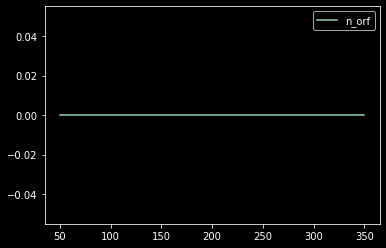

In [26]:
%run diazdelser-correct_orfs.py compare 'ecoli-orf-results.ffn' 'data/ecoli-genes-standard.ffn'

### Ex.3 _(Optional 3 pts)_ Optimizing the classification performance
Write a modified version of the script that is able to determine the minimum ORF length
that gives the best balanced accuracy.

In [27]:
%run diazdelser-acc.py main 'ecoli-orf-results.ffn' 'data/ecoli-genes-standard.ffn' 50

                            Results
n_orf                      5.000000
n_genes                 4211.000000
n_orf_correct              1.000000
ratio_orf_correct          0.200000
n_stop_correct             0.000000
ratio_stop_correct         0.000000
n_incorrect                4.000000
ratio_mismatch_correct     0.800000
acc                        0.583333


In [29]:
%run diazdelser-acc.py compare 'ecoli-orf-results.ffn' 'data/ecoli-genes-standard.ffn' --acc

KeyError: 'acc'

According to the generated graph, the minimum ORF length that gives the best balanced accuracy
is 100 nt, which is roughly 33 aminoacids.
